# Exponential Distribution

For rate parameter $\lambda$ and $x \geq 0$, the probability density function for the exponential distribution is defined as the following:

$$f(x) = \lambda e^{-\lambda x}$$

One way to generate an exponential distribution from a uniform distribution is with the use of inverse transform sampling: https://en.wikipedia.org/wiki/Inverse_transform_sampling

Given a random variable $X$ with cumulative distribution $F$ as well as a uniform random variable $U$ on the interval $(0, 1)$, we have that the random variable distribution defined by $X$ is equivalent to $F^{-1}(U)$.

Resource for exponential distribution: https://en.wikipedia.org/wiki/Exponential_distribution

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def exponential_random_variable(rate_param):
    return - np.log(random.uniform(0, 1)) / rate_param

In [3]:
def generate_exponential_sample(rate_param_var, sample_size, min_num, max_num, step_size):
    num_groups = int((max_num - min_num) / step_size) + 1

    probability = []
    x = []

    for i in range(num_groups):
        x.append(i * step_size)
        probability.append(0)

    for i in range(sample_size):
        num = exponential_random_variable(rate_param_var)

        num -= min_num
        num /= step_size
        num = int(num)

        if (num > num_groups-1):
            sample_size -= 1
            continue

        probability[num] += 1

    for i in range(len(probability)):
        probability[i] /= sample_size * step_size
    
    return x, probability

In [4]:
sample_size = 1000000

min_num = 0
max_num = 5

step_size = 0.1

e_x_05, e_pr_05 = generate_exponential_sample(0.5, sample_size, min_num, max_num, step_size)
e_x_10, e_pr_10 = generate_exponential_sample(1.0, sample_size, min_num, max_num, step_size)
e_x_15, e_pr_15 = generate_exponential_sample(1.5, sample_size, min_num, max_num, step_size)


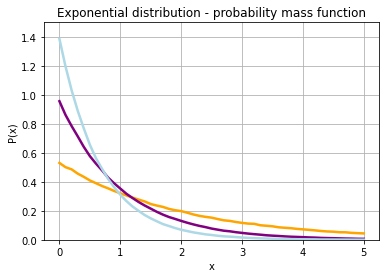

In [5]:
plt.title("Exponential distribution - probability mass function")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.plot(e_x_05, e_pr_05, linewidth = 2.5, color = "orange")
plt.plot(e_x_10, e_pr_10, linewidth = 2.5, color = "purple")
plt.plot(e_x_15, e_pr_15, linewidth = 2.5, color = "lightblue")
plt.ylim(0.0, 1.50)
plt.grid()
plt.show()

# Poisson Distribution

It is possible to generate a Poisson random variable using the exponential random variables we defined before. A random variable generated from a Poisson distribution is actually a discrete number (specifically an integer $\geq 0$).

Given a sequence of exponential random variables $S = \{ x_1, x_2, x_3, \dots \}$ generated from an exponential distribution with rate parameter $\lambda$, the Poisson random variable is defined as the largest $k \in \mathbb{Z}_{\geq 0}$ such that
$$\sum^{k}_{i=1} (x_i) < 1$$
Resource for the Poisson distribution: https://en.wikipedia.org/wiki/Poisson_distribution

In [6]:
def poisson_random_variable(rate_param):
    s = 0
    num = -1
    
    while (s < 1):
        num += 1
        s += exponential_random_variable(rate_param)
    
    return num

In [7]:
def generate_poisson_sample(rate_param_var, sample_size, min_num, max_num):
    probability = []
    x = []

    for i in range(max_num + 1):
        x.append(i)
        probability.append(0)

    for i in range(sample_size):
        num = poisson_random_variable(rate_param_var)

        if (num > max_num):
            sample_size -= 1
            continue

        probability[num] += 1

    for i in range(len(probability)):
        probability[i] /= sample_size
    
    return x, probability

In [8]:
sample_size = 100000

min_num = 0
max_num = 20

p_x_1, p_pr_1 = generate_poisson_sample(1, sample_size, min_num, max_num)
p_x_4, p_pr_4 = generate_poisson_sample(4, sample_size, min_num, max_num)
p_x_10, p_pr_10 = generate_poisson_sample(10, sample_size, min_num, max_num)


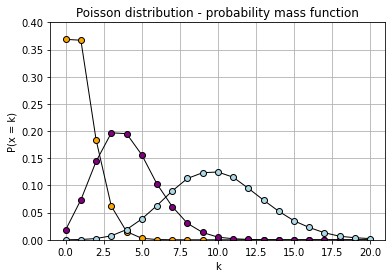

In [9]:
plt.title("Poisson distribution - probability mass function")
plt.xlabel("k")
plt.ylabel("P(x = k)")
plt.plot(p_x_1, p_pr_1, marker = "o", linewidth = 1.0, color = "black", markerfacecolor = "orange")
plt.plot(p_x_4, p_pr_4, marker = "o", linewidth = 1.0, color = "black", markerfacecolor = "purple")
plt.plot(p_x_10, p_pr_10, marker = "o", linewidth = 1.0, color = "black", markerfacecolor = "lightblue")
plt.ylim(0.0, 0.40)
plt.grid()
plt.show()